In [6]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
import matplotlib.pyplot as plt
import numpy as np

### Dataset Analysis

In [ ]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### Scaler Comparison

In [9]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
#X = df[['Glucose','BMI']]
#y = df['Outcome']

# filter for rows where glucose and bmi are greater than 0
#X = X[(X['Glucose'] > 0) & (X['BMI'] > 0)]
#y = y[X.index]

scalers = [None,MinMaxScaler,StandardScaler,MaxAbsScaler]
results = {}

for s in scalers:
    if s == None:
        X_scaled = X.copy()
        name = 'initial'
    else:
        scaler = s()
        X_scaled = scaler.fit_transform(X)
        name = s.__name__

    x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

    model = SVC(kernel='linear').fit(x_train,y_train)
    results[name] = model.score(x_test,y_test)

results = pd.DataFrame(results,index=['accuracy'])
results

,initial,MinMaxScaler,StandardScaler,MaxAbsScaler
accuracy,0.753247,0.75974,0.75974,0.785714


While MaxAbsScaler does handle outliers better than the other scalers, the difference between the scaling methods is not significant when we remove 0 values from the Glucose and BMI columns, if we only keep the 2 most corelated features the initial dataset and StandardScaler perform better than the rest, this perhaps should be studied from a missing values perspective in the next module.

### Kernel Comparison

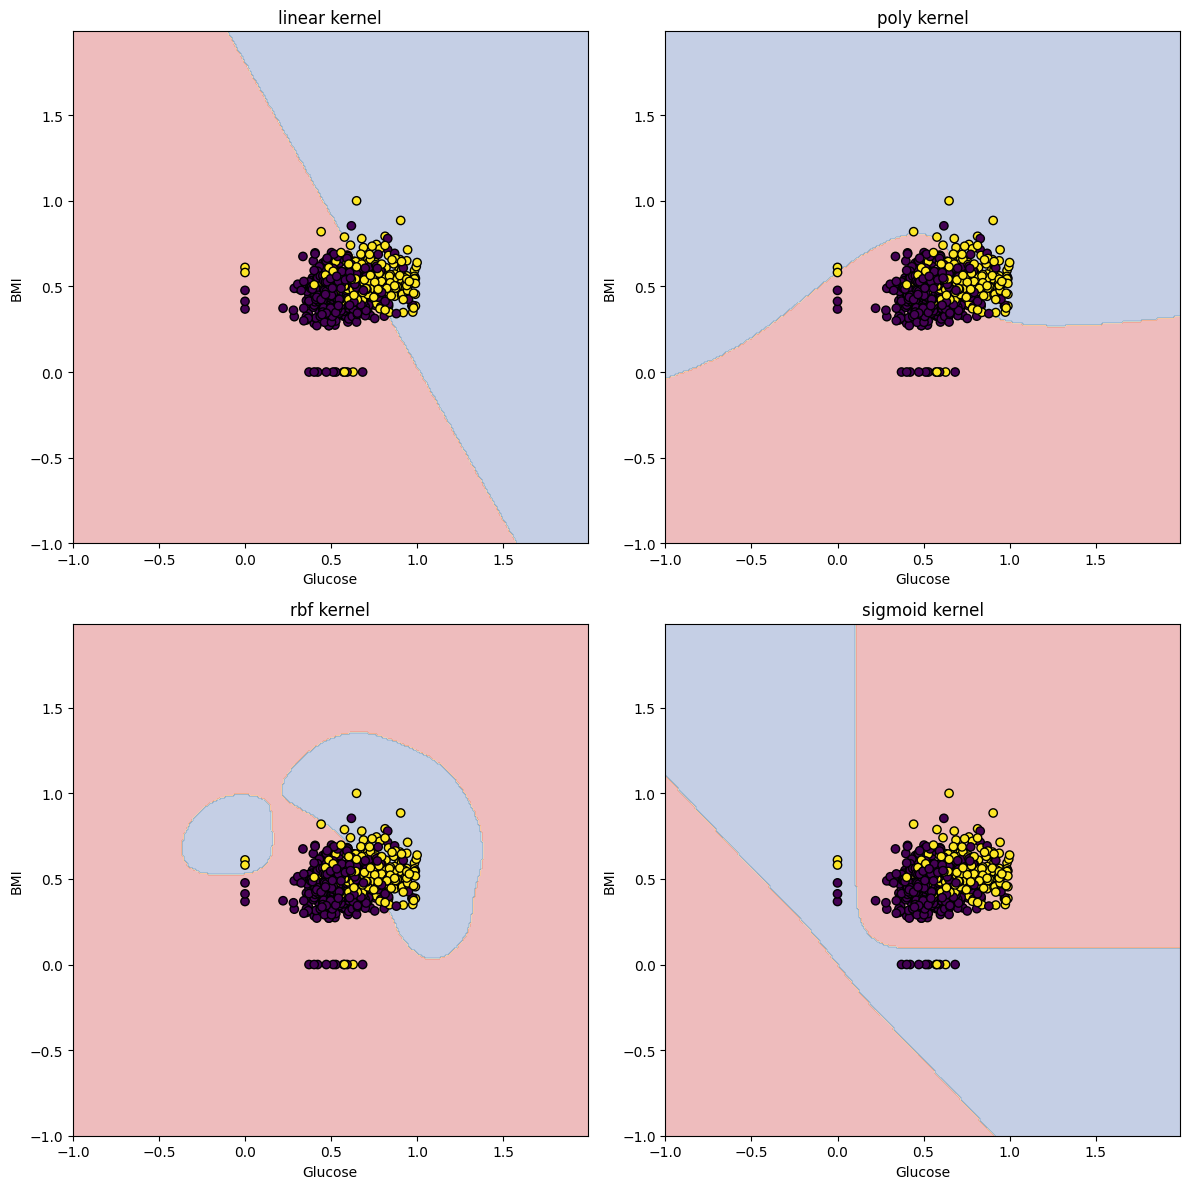

In [10]:
X = df[['Glucose','BMI']]
y = df['Outcome']
kernels = ['linear','poly','rbf','sigmoid']

# filter for rows where glucose and bmi are greater than 0
#X = X[(X['Glucose'] > 0) & (X['BMI'] > 0)]
#y = y[X.index]

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=['Glucose', 'BMI'])

fig, axes = plt.subplots(2,2,figsize=(12,12))
axes = axes.flatten()

for i, k in enumerate(kernels):

    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = SVC(kernel=k).fit(x_train, y_train)
    
    # Create mesh plot
    h = 0.01 
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot 
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = axes[i].scatter(X_scaled[:,0], X_scaled[:,1], c=y, edgecolors='black')
    axes[i].set_title(f'{k} kernel')
    axes[i].set_xlabel('Glucose')
    axes[i].set_ylabel('BMI')

plt.tight_layout()
plt.show()

The algorithm performs quite well regardless of outliers in the data. The shape of the boundary is clearly related to the kernel used, the linear kernel traces a straight line boundary, the polynomial kernel traces a curve and the rbf paints a blob around the positive class (with slight overfitting due to outlier data which can be also removed in the code above), while the sigmoid kernel is not able to find a good boundary.

This shows us that to capture more complex relationships between the features and the target variable, we need to use more complex kernels, however, this also increases the risk of overfitting. However this is on a case to case basis and it is important to use the right kernel for different data, e.g. if the data is linearly separable or has more complex relationships.